<h2> Import Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab
from pylab import *
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#feature selection to remove low variance features
from sklearn.feature_selection import VarianceThreshold

#for PCA
from sklearn.decomposition import PCA

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

#Models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline
# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


<h2> Reading Data Set Using Pandas </h2>

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

<h2>Cleaning and Preprocessing</h2>

In [3]:
#check the first five rows of the data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS_NEXT_MONTH'],
      dtype='object')

In [5]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         30000 non-null  int64
 1   LIMIT_BAL                  30000 non-null  int64
 2   SEX                        30000 non-null  int64
 3   EDUCATION                  30000 non-null  int64
 4   MARRIAGE                   30000 non-null  int64
 5   AGE                        30000 non-null  int64
 6   PAY_0                      30000 non-null  int64
 7   PAY_2                      30000 non-null  int64
 8   PAY_3                      30000 non-null  int64
 9   PAY_4                      30000 non-null  int64
 10  PAY_5                      30000 non-null  int64
 11  PAY_6                      30000 non-null  int64
 12  BILL_AMT1                  30000 non-null  int64
 13  BILL_AMT2                  30000 non-null  int64
 14  BILL_AMT3             

In [7]:
credit.dropna(how='any')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
credit.isna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
credit.drop(['ID'], axis = 1, inplace = True)

<h3>Covariance and Correlation Estimations</h3>
<h4>“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. </h4>

<h3> Covariance Estimations </h3>

In [10]:
covMat = credit.cov()
print(covMat)

                              LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                  1.683446e+10  1571.050630 -22474.028945   
SEX                        1.571051e+03     0.239247      0.005502   
EDUCATION                 -2.247403e+04     0.005502      0.624651   
MARRIAGE                  -7.323670e+03    -0.008014     -0.059184   
AGE                        1.730767e+05    -0.409726      1.275380   
PAY_0                     -3.954593e+04    -0.031685      0.093584   
PAY_2                     -4.603765e+04    -0.041442      0.115025   
PAY_3                     -4.443225e+04    -0.038694      0.107861   
PAY_4                     -4.057181e+04    -0.034411      0.100528   
PAY_5                     -3.667056e+04    -0.030521      0.087340   
PAY_6                     -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                  2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                  2.570130e+09 -1085.595467   1054.657595   
BILL_AMT3           

In [11]:
covMat.to_excel (r'export_covMat_credit.xlsx', index = True, header=True)

<h3>Correlation Estimations</h3>
<h4>Drop one of the two features where the correlation coefficient is greater than .95</h4>

In [12]:
corrMat = credit.corr()
print(corrMat)

                           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
LIMIT_BAL                   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX                         0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION                  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE                   -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE                         0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_0                      -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2                      -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3                      -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4                      -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5                      -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6                      -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_AMT1                   

In [13]:
corrMat.to_excel (r'export_corrMat_credit.xlsx', index = True, header=True)

<h4>BILL_AMT1::BILL_AMT2 = .9515</h4>
<br>
<h3>No features are highly correlated to the dependant variable</h3>

<h4>Drop BILL_AMT1 due to collinearity with BILL_AMT2</h4>

In [14]:
credit.drop(['BILL_AMT1'], axis = 1, inplace = True)
print(credit)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

<h3>Create Categorical Features from Numerical Features</h3>

In [15]:
credit_categorical = credit.copy(deep = True)
credit_categorical['EDUCATION'] = pd.Categorical(credit_categorical.EDUCATION)
credit_categorical['SEX'] = pd.Categorical(credit_categorical.SEX)
credit_categorical['MARRIAGE'] = pd.Categorical(credit_categorical.MARRIAGE)
to_convert = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT_STATUS_NEXT_MONTH' ]
credit_categorical[to_convert] = credit_categorical[to_convert].astype('category')
#credit.EDUCATION.astype('int64')
print(credit_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LIMIT_BAL                  30000 non-null  int64   
 1   SEX                        30000 non-null  category
 2   EDUCATION                  30000 non-null  category
 3   MARRIAGE                   30000 non-null  category
 4   AGE                        30000 non-null  int64   
 5   PAY_0                      30000 non-null  category
 6   PAY_2                      30000 non-null  category
 7   PAY_3                      30000 non-null  category
 8   PAY_4                      30000 non-null  category
 9   PAY_5                      30000 non-null  category
 10  PAY_6                      30000 non-null  category
 11  BILL_AMT2                  30000 non-null  int64   
 12  BILL_AMT3                  30000 non-null  int64   
 13  BILL_AMT4                  3000

In [16]:
credit_categorical.to_csv('credit_categorical.csv', index = False, encoding = 'utf-8')

<h3>Normalize/Scale Features</h3>

In [17]:
##scale LIMIT_BAL
credit_normalized_categorical = credit_categorical.copy(deep = True)
credit_normalized_categorical[['LIMIT_BAL']] = StandardScaler().fit_transform(credit_normalized_categorical[['LIMIT_BAL']])

##using StandardScaler to scale multiple BILL_AMT columns 1-6

credit_normalized_categorical[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6' ]] = StandardScaler().fit_transform(credit_normalized_categorical[['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6' ]])

##using StandardScaler to scale multiple PAY_AMT columns 1-6

credit_normalized_categorical[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6' ]] = StandardScaler().fit_transform(credit_normalized_categorical[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])

credit_normalized_categorical

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,26,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,34,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,37,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,57,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,3,1,39,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,1,3,2,43,-1,-1,-1,-1,0,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,1,2,2,37,4,3,2,-1,0,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,1,3,1,41,1,-1,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


In [18]:
credit_normalized_categorical.to_csv('credit_normalized_categorical.csv', index=False, encoding='utf-8')

In [19]:
#might need to one-hot-encode the categorical variables for certain machine learning algorithms. In which case review
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
# and possibly utilize Dora to do the one hot encoding: https://github.com/NathanEpstein/Dora#setup

In [20]:
credit #validating copied above by actual deep copy and not by reference

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<h2>EDA - Analysis</h2>

In [21]:
# Number of customers by sex
credit_normalized_categorical.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

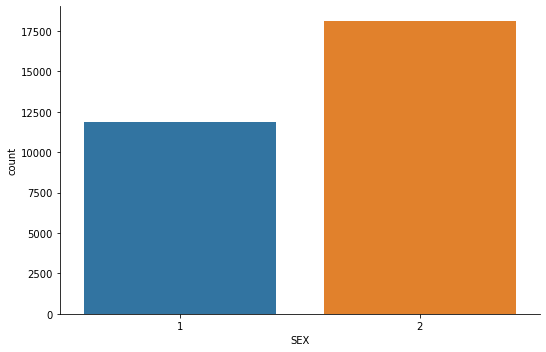

In [22]:
# Instead of a group by, use seaborn to plot the number of males and females
sns.catplot('SEX', data=credit_normalized_categorical, kind='count', aspect=1.5)

<h4>Note of the 30,000 total observations, 30% are men (1) and 60% are women (2)</h4>

In [23]:
# Number of men and women in each of the marriage status
credit_normalized_categorical.groupby(['SEX', 'MARRIAGE'])['SEX'].count()

SEX  MARRIAGE
1    0             14
     1           5190
     2           6553
     3            131
2    0             40
     1           8469
     2           9411
     3            192
Name: SEX, dtype: int64

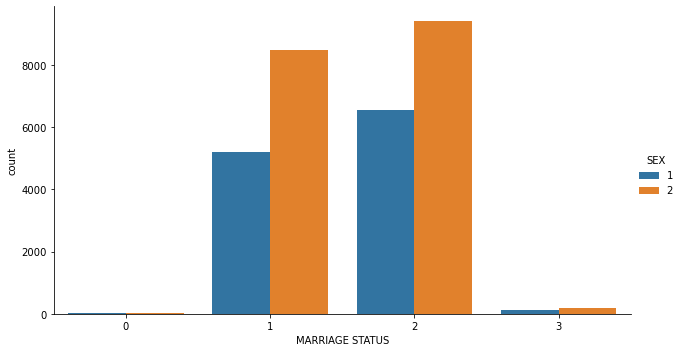

In [24]:
# Again use saeborn to group by Sex and Marriage Status
g = sns.catplot('MARRIAGE', data=credit_normalized_categorical, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('MARRIAGE STATUS')

<h4>Marital status (1 = married; 2 = single; 3 = divorce; 0=others) <br>
Note the overwhelming majority of the clients are either married or single</h4>

In [25]:
df_in_default = credit_normalized_categorical[credit_normalized_categorical['DEFAULT_STATUS_NEXT_MONTH']==1]
df_good_standing = credit_normalized_categorical[credit_normalized_categorical['DEFAULT_STATUS_NEXT_MONTH']==0]
number_of_accounts_in_default = df_in_default.index
number_of_accounts_in_good_standing = df_good_standing.index
print("Number of Accounts Projected to be in Default Next Month: " + str(len(number_of_accounts_in_default)))
print("Number of Accounts Projected to be in Good Standing Next Month: " + str(len(number_of_accounts_in_good_standing)))
print("% Projected in Default Next Month: " + str((len(number_of_accounts_in_default)/(len(number_of_accounts_in_default) + len(number_of_accounts_in_good_standing))) *100) + "%")

Number of Accounts Projected to be in Default Next Month: 6636
Number of Accounts Projected to be in Good Standing Next Month: 23364
% Projected in Default Next Month: 22.12%


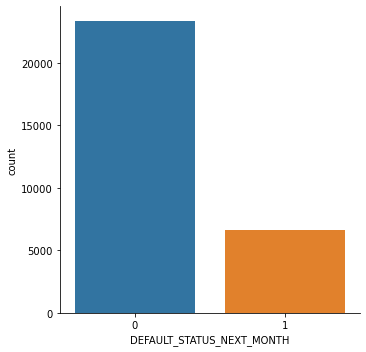

In [26]:
#those in default versus those in good standing
sns.catplot('DEFAULT_STATUS_NEXT_MONTH', data=credit_normalized_categorical, kind='count')

<h4>Over 22% of accounts are projected to be delinquent next month</h4>

In [27]:
#number_of_accounts_in_default in each age grouped by sex
df_in_default.pivot_table('DEFAULT_STATUS_NEXT_MONTH', 'SEX', 'AGE', aggfunc=len, margins=True )

AGE,21,22,23,24,25,26,27,28,29,30,...,65,66,67,68,69,70,72,73,75,All
SEX,,,,,,,,,,,,,,,,,,,,,
1,5.0,48.0,74.0,105.0,109.0,103.0,112.0,105.0,128.0,124.0,...,4.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2873
2,9.0,121.0,173.0,195.0,193.0,150.0,201.0,181.0,185.0,150.0,...,1.0,3.0,2.0,NaN,2.0,1.0,NaN,2.0,NaN,3763
All,14.0,169.0,247.0,300.0,302.0,253.0,313.0,286.0,313.0,274.0,...,5.0,7.0,5.0,1.0,3.0,2.0,1.0,3.0,1.0,6636


In [28]:
# clients in default and not in default grouped by age and sex
table = pd.crosstab(index=[credit_normalized_categorical.DEFAULT_STATUS_NEXT_MONTH,credit_normalized_categorical.AGE], columns=[credit_normalized_categorical.SEX])

In [29]:
table.unstack()

SEX                           1                                           \
AGE                          21    22     23     24     25     26     27   
DEFAULT_STATUS_NEXT_MONTH                                                  
0                          16.0  91.0  186.0  250.0  281.0  361.0  417.0   
1                           5.0  48.0   74.0  105.0  109.0  103.0  112.0   

SEX                                             ...    2                      \
AGE                           28     29     30  ...   67   68   69   70   71   
DEFAULT_STATUS_NEXT_MONTH                       ...                            
0                          401.0  489.0  437.0  ...  5.0  2.0  7.0  5.0  1.0   
1                          105.0  128.0  124.0  ...  2.0  0.0  2.0  1.0  NaN   

SEX                                                 
AGE                         72   73   74   75   79  
DEFAULT_STATUS_NEXT_MONTH                           
0                          1.0  0.0  1.0  1.0  0.0  
1                          0.0  2.0  NaN  0.0  NaN  

[2 rows x 112 columns]

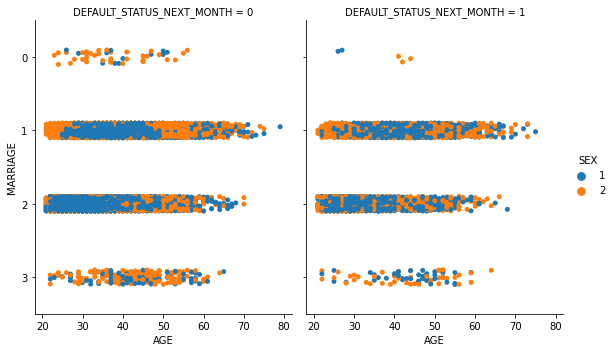

In [30]:
g = sns.catplot(x="AGE", y="MARRIAGE", hue="SEX",
                col="DEFAULT_STATUS_NEXT_MONTH", data=credit_normalized_categorical,
                height=5, aspect=.8)

<h4>Marital status (1 = married; 2 = single; 3 = divorce; 0=others) <br>
Sex (1 = male; 2 = female) <br>
Default_Status (1 = in default; 2 = in good standing)

This shows the majority of next month's projected defaults are clients with a married status, heavily comprised of men between the ages of 30
and 50. Interestingly, it appears default by married women will be common over the age of 50, with less men over the
age of 50 in default next month. <br>

The same pattern holds true for those with marital status of single, but lower in age is when these occur. It apears
the clients whom are single, between the ages of 20 and 40, projected to be in default next month, tend to be men. Interestingly, single women will
make up the majority of defaults next month in the over 40 age group. <br>

Looking at the group of clients in good standing, it appears that more men and women, married and single maintain good
standing as they age based on next month's projected default status. These charts do not identify causation for this observation and only indicate this pattern for the next month. <br>
    
It appears in general clients with an other marriage status are projected to maintain a good standing next month. This may be an interesting group to
further understand and focus future account development into this segment. <br>
    
Finally, it does appear there are more divorced females accross all ages projected to be in good standing next month than men. </h4>

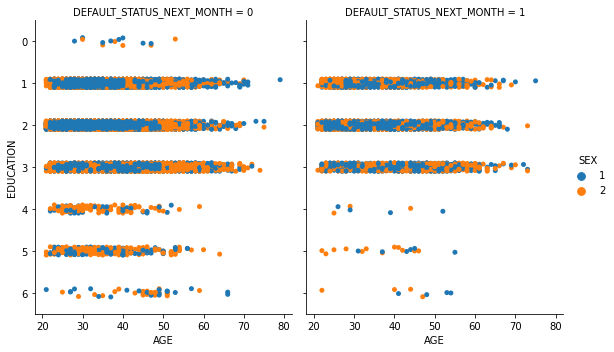

In [31]:
g = sns.catplot(x="AGE", y="EDUCATION", hue="SEX",
                col="DEFAULT_STATUS_NEXT_MONTH", data=credit_normalized_categorical,
                height=5, aspect=.8)

<h4> Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others) <br>
Sex (1 = male; 2 = female) <br>

This shows the majority of borrows projected to be in default next month have graduate school, university, or high school educations.
It is worth looking more closely at the categories for others in education. These accounts tend to be in good standing
across all age groups as projected for next month. </h4>


In [32]:
print('Average and median age of clients are %0.f and %0.f years old, respectively'%(credit_normalized_categorical.AGE.mean(), 
                                                                          credit_normalized_categorical.AGE.median()))

Average and median age of clients are 35 and 34 years old, respectively


In [33]:
credit_normalized_categorical.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "Distribution of Clients' Ages")

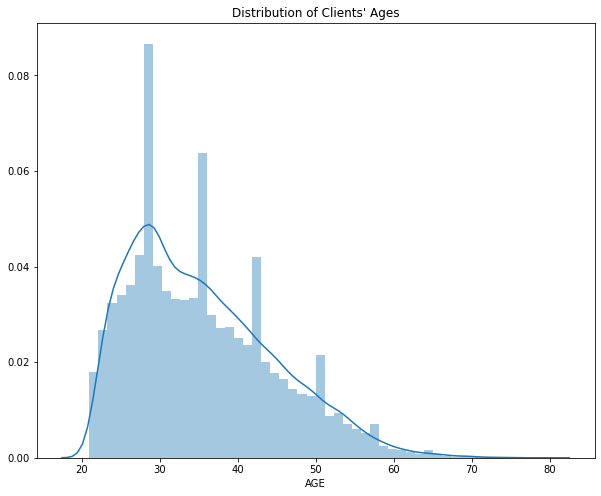

In [34]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(credit_normalized_categorical['AGE'])
age_dist.set_title("Distribution of Clients' Ages")

<h4> This shows further that the majority of the clients are upper 20's to mid 30's and borrows trail off in number <br>
as their age increases</h4>

In [35]:
#add curr_month_spend column for every month EXCEPT April since no Mar bill data to use to calculate
#use credit df since the others are normalized
#normalize if need this column for future algorithms usage

test = credit.copy(deep = True)

test['CURR_SPND5'] = test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT6']) # CURR_SPND5 == May new spend
test['CURR_SPND4'] = test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT5']) # CURR_SPND4 == June new spend
test['CURR_SPND3'] = test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT4']) # CURR_SPND3 == July new spend
test['CURR_SPND2'] = test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT3']) # CURR_SPND2 == Augst new spend



In [36]:
print(test.head)

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  PA

In [37]:
# is there a correlation between monthly spend and pay status?

corrMat = test.corr()
print(corrMat)
corrMat.to_csv('test_corr_mat.csv', index=False, encoding='utf-8')

                           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
LIMIT_BAL                   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX                         0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION                  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE                   -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE                         0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_0                      -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2                      -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3                      -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4                      -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5                      -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6                      -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_AMT2                   

<h4> There is no correlation between monthly spend amount and default status for the next month or payment state each month<h4>

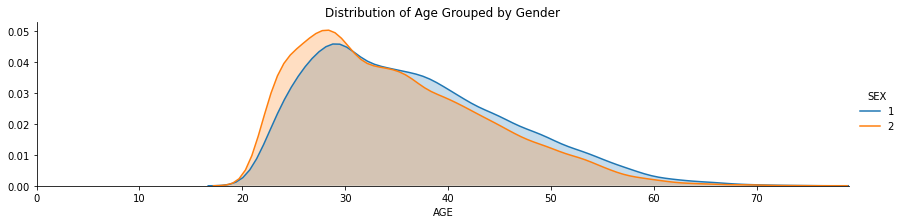

In [38]:
fig = sns.FacetGrid(credit_normalized_categorical, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_normalized_categorical['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

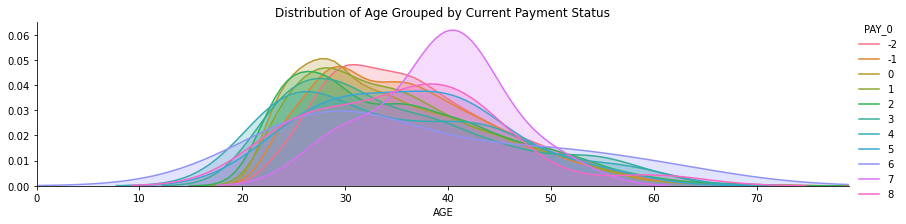

In [39]:
fig = sns.FacetGrid(credit_normalized_categorical, hue='PAY_0', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_normalized_categorical['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Current Payment Status')
fig.add_legend()

<h4>PAY_0 Legend: -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
months; 9 = payment delay for nine months and above. <br>

This is interesting in that is shows that delinquency is highest in the current month among those under 30.
Of those clients whom did not use their credit account in the most recent month, they tend to be aged between 35 and 45. 
This chart reaffirms prior similar analysis that default tends to occur among the clients under aged 40 and default tends 
to occur more infrequently in clients over age 40, continuing to decline the higher their age is. </h4>

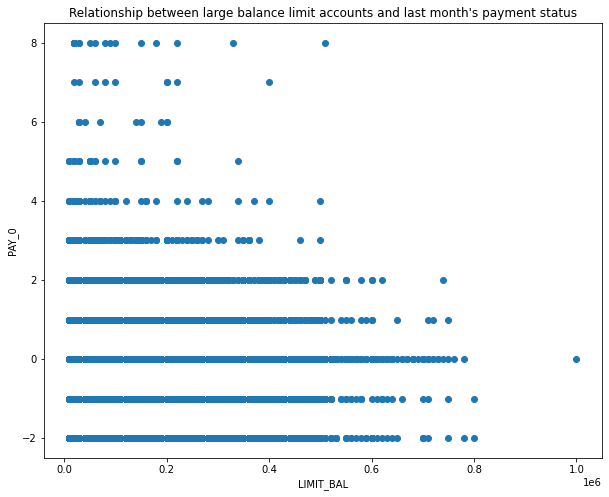

In [40]:
x = credit['LIMIT_BAL']
y = credit['PAY_0']
plt.xlabel("LIMIT_BAL")
plt.ylabel("PAY_0")
plt.title("Relationship between large balance limit accounts and last month's payment status")
plt.scatter(x,y)
plt.show()

<h4> This shows credit one has been doing a pretty good job managing large credit limits. This shows there are
a large number of accounts with large balance limits with accounts in good standing (PAY_0 == -2, -1 or 0). This also shows 
the company needs to continue to closely monitor a number of the accounts with large balance limits with PAY_0 == 1 and 2.
These accounts are just starting to get behind in payments as of last month. It may be worthwhile to look at those specific accounts
with large balance limites where there is a pattern of being behind 1 or 2 months and then catching up, or perpetually 
behind 1 or 2 months. The latter case would be cause for concern demonstrating a continual challenge month to month to catch up.
</h4>

Text(0.5, 1.0, 'Last Months Bill Amount versus\nCurrent Payment Status By Sex')

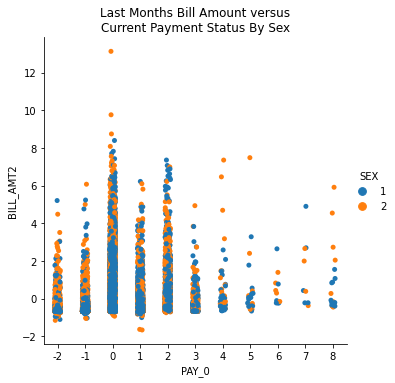

In [41]:
# Current Bill AMount versus current Payment Status Grouped by gender
sns.catplot('PAY_0','BILL_AMT2', hue='SEX', data=credit_normalized_categorical)
plt.title("Last Months Bill Amount versus" + '\n' + "Current Payment Status By Sex")

<h4> This shows an interesting relationship between the last month's bill amount and the current account payment status. 
Larger bill amounts may see 2 months late payments or less in general. The bill amount then tends to decrease significantly
with delinquency above 2 months. It continues to look like there is a large number of account users whom pay off their 
accounts each month.

In [42]:
#Discretize Age to make some of the charts a little more readable
#also answers the question of which generation, or which ten years of ones life is most responsible with credit?

temp_credit = credit.copy(deep = True)
temp_credit['age_bin']=pd.cut(x = temp_credit['AGE'],
                        bins = [0,20,30,40,50,60,70,80,90,100], 
                        labels = ["Teens", "20's", "30's","40's", "50's", "60's", "70's", "80's", "90's"])
temp_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH,age_bin
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,20's
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20's
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30's
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30's
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50's


In [43]:
summary = temp_credit.groupby(['age_bin']).mean()
summary


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_STATUS_NEXT_MONTH
age_bin,,,,,,,,,,,,,,,,,,,,,
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20's,132490.692818,1.651140,1.744938,1.831018,26.534096,0.081812,-0.010079,-0.040316,-0.104604,-0.146100,...,38591.703441,35961.901571,34901.505857,4920.404794,4940.170072,4320.462817,4095.748297,4193.483973,4343.195405,0.224371
30's,197271.539251,1.592738,1.782787,1.469150,35.223280,-0.105666,-0.245123,-0.276020,-0.323065,-0.366751,...,46573.090918,43659.580043,41855.185102,6197.083543,6634.259965,5893.496686,5492.308877,5285.815271,6074.322972,0.204331
40's,179680.213156,1.569192,2.043963,1.289592,44.852623,-0.064779,-0.177519,-0.214654,-0.261282,-0.320067,...,44934.279600,41621.543214,40343.811823,6175.178185,6753.429309,5723.081932,5212.845296,5291.243131,5474.148376,0.232973
50's,159349.023535,1.525789,2.204807,1.293941,54.141713,0.043065,-0.085628,-0.112168,-0.174261,-0.219329,...,43611.846269,39851.553831,37701.759639,5317.235353,5153.104156,4886.427641,4176.492238,3849.008513,4682.032048,0.252379
60's,200194.552529,1.455253,2.210117,1.202335,63.961089,0.147860,-0.112840,-0.241245,-0.322957,-0.315175,...,61223.754864,57520.470817,56638.575875,6097.715953,4848.859922,7211.891051,4364.159533,6375.186770,4817.284047,0.264591
70's,226000.000000,1.400000,2.200000,1.000000,73.266667,-0.333333,-0.666667,-0.666667,-0.466667,-0.466667,...,85520.333333,84323.000000,85120.800000,4137.600000,4315.733333,4893.266667,4769.666667,4869.533333,6594.866667,0.333333
80's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


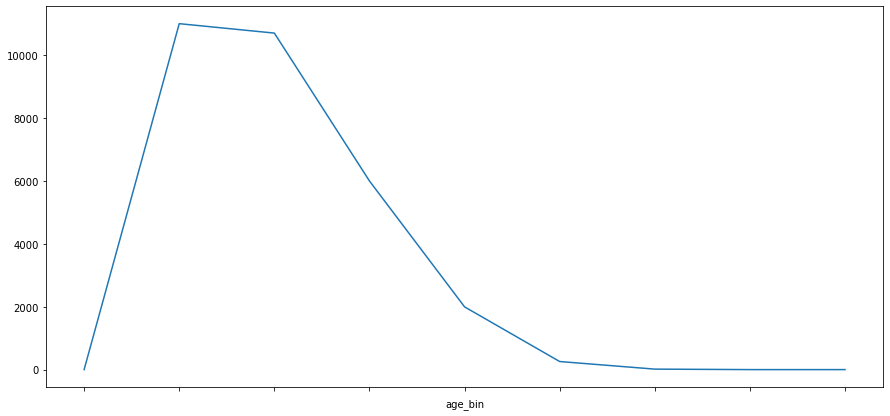

In [44]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
temp_credit.groupby(['age_bin']).count()['BILL_AMT2'].plot(ax=ax)

<h4> This chart shows the average BILL_AMT1 carried by each age group binned by decades <br>
("Teens", "20's", "30's","40's", "50's", "60's", "70's", "80's", "90's") <br>
The 20's and 30's carried the highest average bill amount in the last month as demonstrated in other charts in this analysis. </h4>

<h3>Visualizing the Data</h3>

In [45]:
header = credit_categorical.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS_NEXT_MONTH'],
      dtype='object')


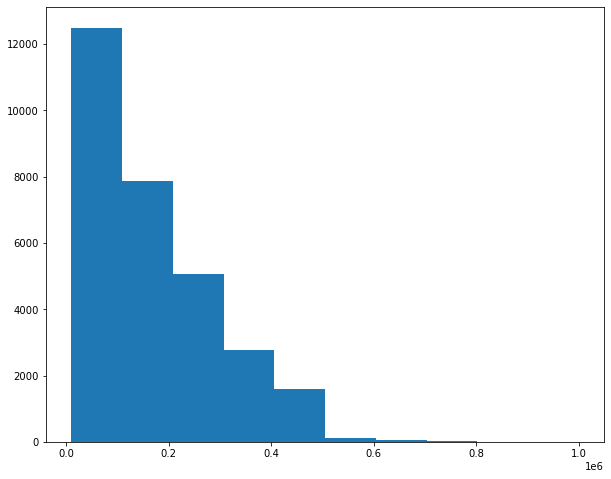

In [46]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

<h3>Adding Histogram plots</h3>

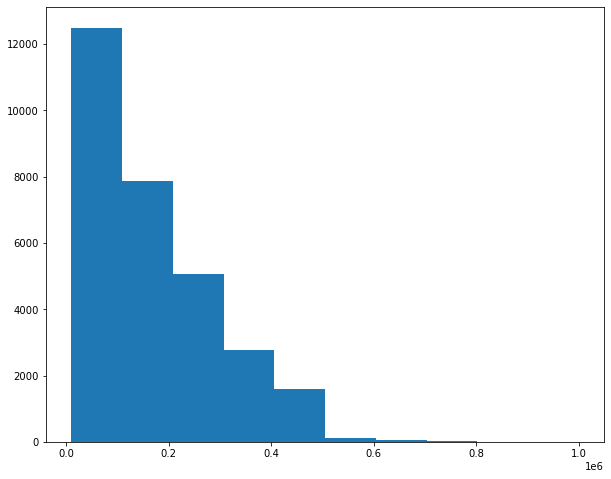

In [47]:
plt.hist(credit_categorical['LIMIT_BAL'])
plt.show()

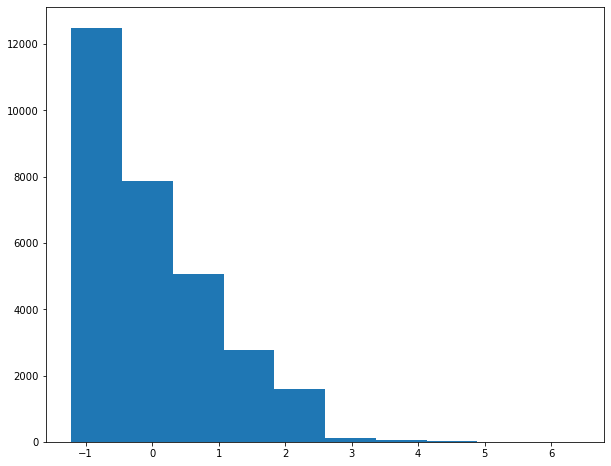

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

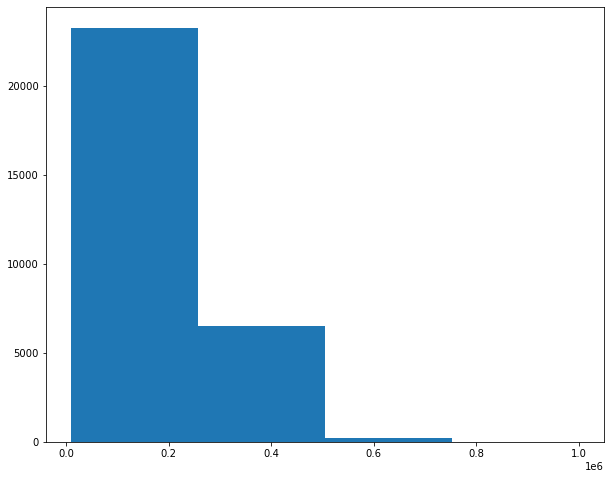

In [48]:
plt.hist(credit_normalized_categorical['LIMIT_BAL'])
plt.show()
credit_normalized_categorical.max()
plt.hist(credit['LIMIT_BAL'], bins=4)

<h3>Adding Line Plots</h3>

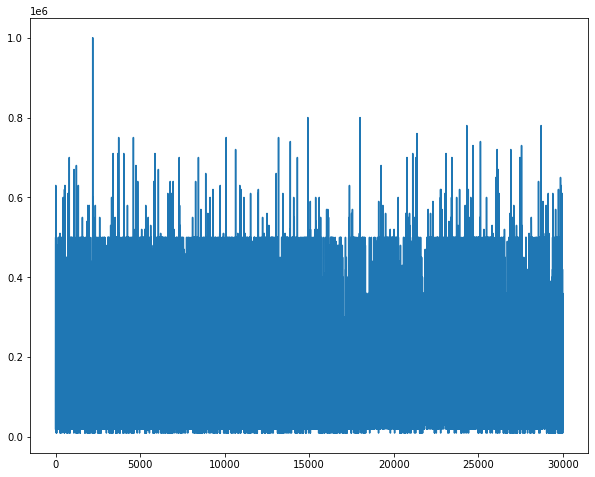

In [49]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

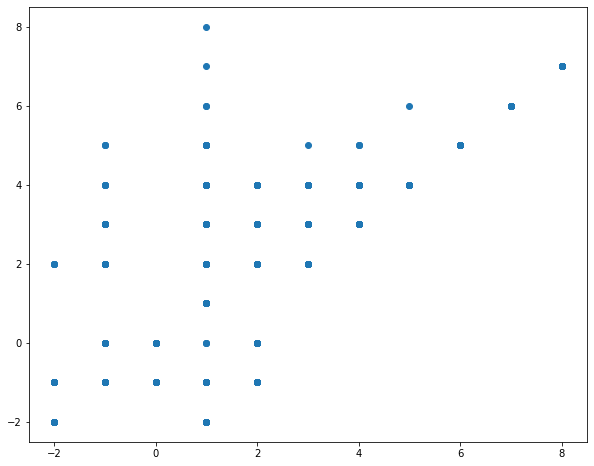

In [50]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

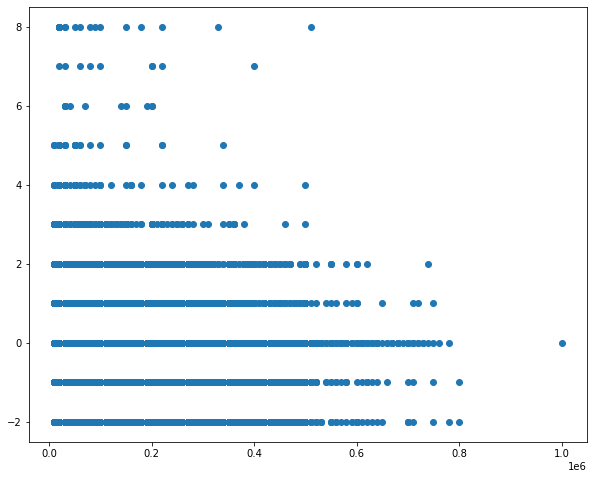

In [51]:
x = credit['LIMIT_BAL']
y = credit['PAY_0']
plt.scatter(x,y)
plt.show()

In [52]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_STATUS_NEXT_MONTH'],
      dtype='object')


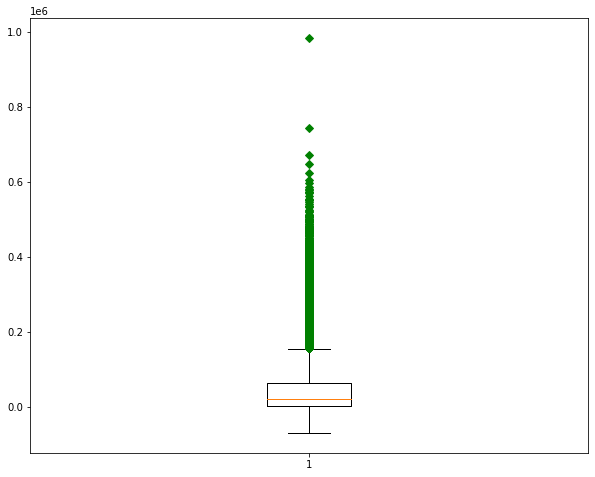

In [53]:
A = credit['BILL_AMT2']
plt.boxplot(A,0,'gD')
plt.show()

<h2>Assess if there are any near zero variance features to be removed</h2>

In [54]:
credit_normalized_categorical.info()
print(credit_normalized_categorical)

selector = VarianceThreshold(.90)
credit_nc_nzv = selector.fit_transform(credit_normalized_categorical)
print(credit_nc_nzv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LIMIT_BAL                  30000 non-null  float64 
 1   SEX                        30000 non-null  category
 2   EDUCATION                  30000 non-null  category
 3   MARRIAGE                   30000 non-null  category
 4   AGE                        30000 non-null  int64   
 5   PAY_0                      30000 non-null  category
 6   PAY_2                      30000 non-null  category
 7   PAY_3                      30000 non-null  category
 8   PAY_4                      30000 non-null  category
 9   PAY_5                      30000 non-null  category
 10  PAY_6                      30000 non-null  category
 11  BILL_AMT2                  30000 non-null  float64 
 12  BILL_AMT3                  30000 non-null  float64 
 13  BILL_AMT4                  3000

<h4>No near zero variance features to be removed</h4>

<h2>Dimensionality Reduction Analysis with PCA</h2>

In [55]:
pca = PCA().fit(credit_normalized_categorical)
print('Explained variance by each component: %s' % pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_,columns = credit_normalized_categorical.columns))

Explained variance by each component: [7.99935636e-01 6.45461847e-02 4.15794674e-02 1.36917560e-02
 8.97284292e-03 8.37861373e-03 8.29202514e-03 8.20307464e-03
 7.39788937e-03 6.94666098e-03 6.63838641e-03 5.05500562e-03
 4.58952394e-03 3.33069576e-03 2.46496224e-03 2.29462931e-03
 1.98463558e-03 1.64143070e-03 1.61172596e-03 1.39255131e-03
 5.40275008e-04 2.80207687e-04 2.31819405e-04]
    LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0    0.016120 -0.004807   0.015019 -0.023509  0.999229 -0.005157 -0.006935   
1   -0.037898 -0.012716   0.032781  0.001524  0.005522  0.271656  0.342954   
2    0.297770  0.008813  -0.060083 -0.002398 -0.023836 -0.194310 -0.225494   
3    0.060866 -0.006341  -0.035336  0.006514  0.002662 -0.062358  0.005135   
4   -0.102213  0.011781   0.018193  0.004853  0.001122 -0.366237 -0.320340   
5   -0.052441 -0.001819   0.055484  0.000348 -0.000717  0.051257  0.033664   
6   -0.292545 -0.010083   0.182695 -0.004425 -0.001071  0.426902

<h4>Since the first feature is the highest value, at .799, it is still not high enough to consider most of the information being concentrated in that component.
So, do not reduce the feature set any further</h4>

<h2>Start Classification Modeling</h2>
<h4>Setup features and depedant variables for modeling</h4>

In [56]:
credit_normalized_categorical.info()
print(credit_normalized_categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LIMIT_BAL                  30000 non-null  float64 
 1   SEX                        30000 non-null  category
 2   EDUCATION                  30000 non-null  category
 3   MARRIAGE                   30000 non-null  category
 4   AGE                        30000 non-null  int64   
 5   PAY_0                      30000 non-null  category
 6   PAY_2                      30000 non-null  category
 7   PAY_3                      30000 non-null  category
 8   PAY_4                      30000 non-null  category
 9   PAY_5                      30000 non-null  category
 10  PAY_6                      30000 non-null  category
 11  BILL_AMT2                  30000 non-null  float64 
 12  BILL_AMT3                  30000 non-null  float64 
 13  BILL_AMT4                  3000

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
credit_normalized_categorical[credit_normalized_categorical.columns] = scaler.fit_transform(credit_normalized_categorical[credit_normalized_categorical.columns])
print(credit_normalized_categorical)
print(credit_normalized_categorical.info())

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101  1.0   0.333333  0.333333  0.051724    0.4    0.4    0.1   
1       0.111111  1.0   0.333333  0.666667  0.086207    0.1    0.4    0.2   
2       0.080808  1.0   0.333333  0.666667  0.224138    0.2    0.2    0.2   
3       0.040404  1.0   0.333333  0.333333  0.275862    0.2    0.2    0.2   
4       0.040404  0.0   0.333333  0.333333  0.620690    0.1    0.2    0.1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121  0.0   0.500000  0.333333  0.310345    0.2    0.2    0.2   
29996   0.141414  0.0   0.500000  0.666667  0.379310    0.1    0.1    0.1   
29997   0.020202  0.0   0.333333  0.666667  0.275862    0.6    0.5    0.4   
29998   0.070707  0.0   0.500000  0.333333  0.344828    0.3    0.1    0.2   
29999   0.040404  0.0   0.333333  0.333333  0.431034    0.2    0.2    0.2   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [58]:
credit_normalized_categorical['EDUCATION'] = pd.Categorical(credit_normalized_categorical.EDUCATION)
credit_normalized_categorical['SEX'] = pd.Categorical(credit_normalized_categorical.SEX)
credit_normalized_categorical['MARRIAGE'] = pd.Categorical(credit_normalized_categorical.MARRIAGE)
to_convert = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT_STATUS_NEXT_MONTH' ]
credit_normalized_categorical[to_convert] = credit_normalized_categorical[to_convert].astype('category')
#credit.EDUCATION.astype('int64')
print(credit_normalized_categorical.info())
print(credit_normalized_categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LIMIT_BAL                  30000 non-null  float64 
 1   SEX                        30000 non-null  category
 2   EDUCATION                  30000 non-null  category
 3   MARRIAGE                   30000 non-null  category
 4   AGE                        30000 non-null  float64 
 5   PAY_0                      30000 non-null  category
 6   PAY_2                      30000 non-null  category
 7   PAY_3                      30000 non-null  category
 8   PAY_4                      30000 non-null  category
 9   PAY_5                      30000 non-null  category
 10  PAY_6                      30000 non-null  category
 11  BILL_AMT2                  30000 non-null  float64 
 12  BILL_AMT3                  30000 non-null  float64 
 13  BILL_AMT4                  3000

In [59]:
#features
features = credit_normalized_categorical.iloc[:,0:22]
print('Summary of feature sample')
print(features)

Summary of feature sample
       LIMIT_BAL  SEX EDUCATION  MARRIAGE       AGE PAY_0 PAY_2 PAY_3 PAY_4  \
0       0.010101  1.0  0.333333  0.333333  0.051724   0.4   0.4   0.1   0.1   
1       0.111111  1.0  0.333333  0.666667  0.086207   0.1   0.4   0.2   0.2   
2       0.080808  1.0  0.333333  0.666667  0.224138   0.2   0.2   0.2   0.2   
3       0.040404  1.0  0.333333  0.333333  0.275862   0.2   0.2   0.2   0.2   
4       0.040404  0.0  0.333333  0.333333  0.620690   0.1   0.2   0.1   0.2   
...          ...  ...       ...       ...       ...   ...   ...   ...   ...   
29995   0.212121  0.0  0.500000  0.333333  0.310345   0.2   0.2   0.2   0.2   
29996   0.141414  0.0  0.500000  0.666667  0.379310   0.1   0.1   0.1   0.1   
29997   0.020202  0.0  0.333333  0.666667  0.275862   0.6   0.5   0.4   0.1   
29998   0.070707  0.0  0.500000  0.333333  0.344828   0.3   0.1   0.2   0.2   
29999   0.040404  0.0  0.333333  0.333333  0.431034   0.2   0.2   0.2   0.2   

      PAY_5  ... BILL_AMT

In [60]:
#dependent variable
depVar = credit_normalized_categorical.iloc[:,22]
print(depVar)

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
29995    0.0
29996    0.0
29997    1.0
29998    1.0
29999    1.0
Name: DEFAULT_STATUS_NEXT_MONTH, Length: 30000, dtype: category
Categories (2, float64): [0.0, 1.0]


<h4>Define the training set (70%) and test set (30%)</h4>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.30, random_state=5)

In [62]:
X_train.shape, X_test.shape

((21000, 22), (9000, 22))

In [63]:
y_train.shape,y_test.shape

((21000,), (9000,))

cvRF (estimators = 300) accuracy score: 0.807


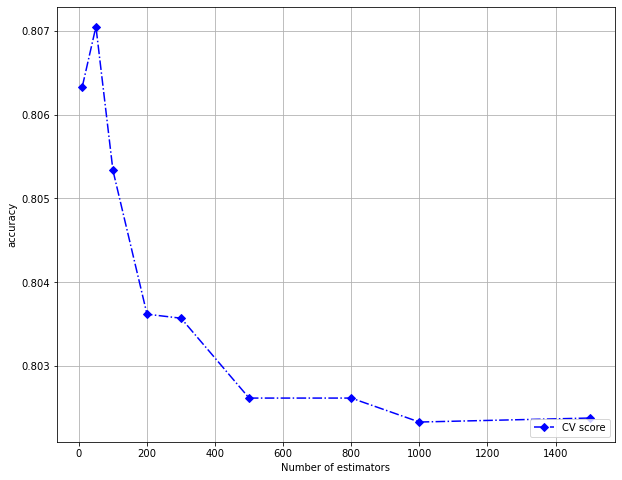

Best parameters: {'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 10}
Best accuracy: 0.819
cvRF (estimators = 10, min_samples_leaf = 1, and max_features = 7) accuracy score: 0.819


In [64]:
#define models and pass the training data to the models
#and run cross validation

crossvalidation = KFold(n_splits=5, shuffle = True, random_state = 1)
scorer = 'accuracy'
#Random Forest Classifier

modelRF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
modelRF.fit(X_train, y_train)

cvRF = cross_val_score(modelRF, X_train, y_train, scoring = scorer, cv = crossvalidation)
print('cvRF (estimators = 300) accuracy score: %0.3f' % np.mean(cvRF))

#the following verifies the impact the number of estimators has on the RFClassifier
#interestingly 50 estimators appears to produce the best results - set it to 50 above here to output the 
#cvRF accuracty score above

param_range = [10, 50, 100, 200, 300, 500, 800, 1000, 1500]
train_scores, test_scores = validation_curve(modelRF, X_train, y_train, 'n_estimators', param_range = param_range,
                                                                        cv=crossvalidation,
                                                                        scoring = 'accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

plt.plot(param_range, mean_test_scores, 'bD-.', label = "CV score")
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right', numpoints=1)
plt.show()

#knowing the 50 estimators appears to produce the best score with all other default parameters, we can now
#run a grid search on other parameters to estimate the best parameters and accuracy

max_features = [X_train.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [10, 50, 300]
search_grid = {'n_estimators':n_estimators,
                'max_features':max_features,
                 'min_samples_leaf':min_samples_leaf}
search_func = GridSearchCV(estimator = modelRF,
                          param_grid=search_grid,
                          scoring=scorer,
                          cv=crossvalidation)
search_func.fit(X_train,y_train)
best_params = search_func.best_params_
best_score = search_func.best_score_
print('Best parameters: %s' % best_params)
print('Best accuracy: %0.3f' % best_score)

#so, rerun the model, train, and cv with:
#Best parameters: {'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 10}
# to get Best accuracy: 0.819

modelRF = RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_leaf = 1, max_features = 7, random_state=0)
modelRF.fit(X_train, y_train)

cvRF = cross_val_score(modelRF, X_train, y_train, scoring = scorer, cv = crossvalidation)
print('cvRF (estimators = 10, min_samples_leaf = 1, and max_features = 7) accuracy score: %0.3f' % np.mean(cvRF))

In [65]:
#Support Vector Machine
modelSVM = svm.LinearSVC(random_state = 1)

cvSVM = cross_val_score(modelSVM, X_train, y_train, scoring = scorer, cv = crossvalidation)
test_scoreSVM = modelSVM.fit(X_train, y_train).score(X_test,y_test)
print('cvSVM accuracy score using default values: %0.3f' % np.mean(cvSVM))
print('TestSVM accuracy score using default values: %0.3f' % np.mean(test_scoreSVM))

print('\n')

#search for an optimal C AND loss str AND penalty str
search_space = {'C': np.logspace(-3,3,7),
               'loss':['hinge','squared_hinge'],
               'penalty': ['l1','l2']}
gridsearch = GridSearchCV (modelSVM,
                          param_grid=search_space,
                          scoring= scorer,
                          refit=True,
                          cv=crossvalidation)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gridsearch.fit(X_train,y_train)

cvSVM = gridsearch.best_score_
test_scoreSVM = gridsearch.score(X_test,y_test)

print('--Using GridSearch to find optimal C value and loss str--')
print('\n')
print('cvSVM accuracy score: %0.3f' % cvSVM)
print('TestSVM accuracy score: %0.3f' % test_scoreSVM)
print('Best parameters: %s' % gridsearch.best_params_)

cvSVM accuracy score using default values: 0.800
TestSVM accuracy score using default values: 0.796


--Using GridSearch to find optimal C value and loss str--


cvSVM accuracy score: 0.801
TestSVM accuracy score: 0.806
Best parameters: {'C': 100.0, 'loss': 'hinge', 'penalty': 'l2'}


cvKNN where k =  20  accuracy score: 0.807


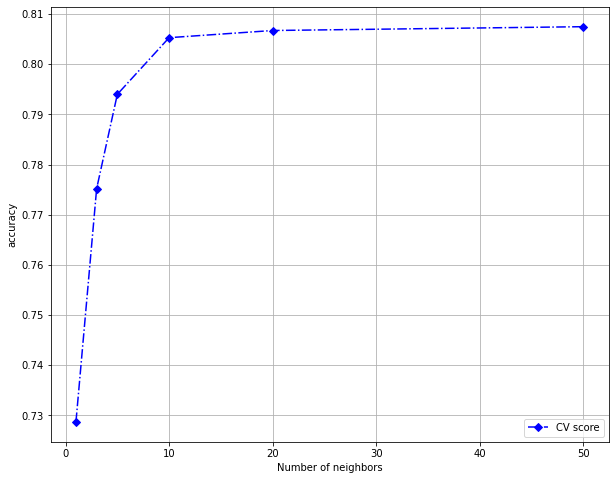

Best parameters: {'n_neighbors': 20, 'weights': 'distance'}
Best accuracy: 0.808


In [66]:
#KNearestNeighbors

modelKNN = KNeighborsClassifier(n_neighbors=20)
modelKNN.fit(X_train, y_train)

cvKNN = cross_val_score(modelKNN, X_train, y_train, scoring = 'accuracy', cv = crossvalidation)
print('cvKNN where k = ', 20, ' accuracy score: %0.3f' % np.mean(cvKNN))

#the following verifies the impact the number of neighbors has on the KNN Classifier
#interestingly 20 estimators appears to produce the best results - set it to 20 above here to output the 
#KNN accuracty score above. Beyond 20 is a flattening of the curve and a limit to economies of scale - no real
#benefit to the additional compute time/cost

param_range = [1, 3, 5, 10, 20, 50]
train_scoresKNN, test_scoresKNN = validation_curve(modelKNN, X_train, y_train, 'n_neighbors', param_range = param_range,
                                                                        cv=crossvalidation,
                                                                        scoring = 'accuracy')

mean_test_scores = np.mean(test_scoresKNN, axis=1)

plt.plot(param_range, mean_test_scores, 'bD-.', label = "CV score")
plt.grid()
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right', numpoints=1)
plt.show()

#knowing that k=20 appears to produce the best score with all other default parameters, we can now
#run a grid search on other parameters to estimate the best parameters and accuracy

weights = ['uniform', 'distance']
n_neighbors = [10, 15, 20, 25, 30, 35]
search_grid = {'n_neighbors':n_neighbors,
                'weights':weights}
search_func = GridSearchCV(estimator = modelKNN,
                          param_grid=search_grid,
                          scoring=scorer,
                          cv=crossvalidation)
search_func.fit(X_train,y_train)
best_params = search_func.best_params_
best_score = search_func.best_score_
print('Best parameters: %s' % best_params)
print('Best accuracy: %0.3f' % best_score)

In [67]:
#Predict with SVM
#predSVM = modelSVM.predict(X_test)
#print("Test accuracy score for SVM = ", round(modelSVM.score(X_test, y_test), 4))

In [68]:
#modelRF has the best outcome, so make the final prediction with the modelRF

#Predict with RF
predRF = modelRF.predict(X_test)
print("Test accuracy score for RF = ", round(modelRF.score(X_test, y_test), 4))

Test accuracy score for RF =  0.818


In [69]:
#Make Predictions with all of the models

#Predict with KNN
#predKNN = modelKNN.predict(X_test)
#print("Test accuracy score for KNN = ", round(modelKNN.score(X_test, y_test), 4))

<h2>Conclusion</h2>


<h4>With the RandomForest model create (modelRF), we can predict default probability with about 81% confidence. </h4>
